Importing packages

In [550]:
import pandas as pd
import numpy as np
import requests
from io import StringIO
import seaborn as sns
import matplotlib.pyplot as plt

Pulling data from API

In [551]:
url = "https://apisidra.ibge.gov.br/values//t/9542/p/2022/v/950/c59/allxt/c2/allxt/c86/allxt/c287/93086,93087,2999,9482,9483,9484/n3/all/h/y/f/n"
r = requests.get(url)
if r.ok:
    data = pd.read_json(StringIO(r.text))
else:
    print('Tente novamente. Status code:', r.status_code)

Cleaning data

In [552]:
data = data.rename(columns=data.iloc[0]).drop(data.index[0])
data = data.reset_index(drop=True)
data = data.drop(columns=['Nível Territorial','Unidade de Medida','Variável', 'Ano'])
negativos = len(data[data['Valor']=='-'])
print(f'Valores negativos:', negativos)
print('---------Cleaning-------')
data['Valor'] = data['Valor'].replace({'-': np.nan})
data['Valor'] = pd.to_numeric(data['Valor'])
data = data.dropna(subset=['Valor'])
print(data.isnull().sum())
print('-------dtypes-----------')
print(data.dtypes)
data.loc[:, 'Idade'] = data['Idade'].str.replace(r'(\d+)\s*a\s*(\d+)\s*anos', r'\1-\2', regex=True)

Valores negativos: 15
---------Cleaning-------
Valor                   0
Alfabetização           0
Sexo                    0
Cor ou raça             0
Idade                   0
Unidade da Federação    0
dtype: int64
-------dtypes-----------
Valor                   float64
Alfabetização            object
Sexo                     object
Cor ou raça              object
Idade                    object
Unidade da Federação     object
dtype: object


In [553]:
lista = data.columns[1:].tolist()
for coluna in lista:
    print(f'Coluna {coluna}:')
    print(data[coluna].unique())

Coluna Alfabetização:
['Alfabetizadas' 'Não alfabetizadas']
Coluna Sexo:
['Homens' 'Mulheres']
Coluna Cor ou raça:
['Branca' 'Preta' 'Amarela' 'Parda' 'Indígena']
Coluna Idade:
['15-19' '20-24' '25-34' '35-44' '45-54' '55-64']
Coluna Unidade da Federação:
['Rondônia' 'Acre' 'Amazonas' 'Roraima' 'Pará' 'Amapá' 'Tocantins'
 'Maranhão' 'Piauí' 'Ceará' 'Rio Grande do Norte' 'Paraíba' 'Pernambuco'
 'Alagoas' 'Sergipe' 'Bahia' 'Minas Gerais' 'Espírito Santo'
 'Rio de Janeiro' 'São Paulo' 'Paraná' 'Santa Catarina'
 'Rio Grande do Sul' 'Mato Grosso do Sul' 'Mato Grosso' 'Goiás'
 'Distrito Federal']


In [554]:
uf = {
    'Rondônia': 'RO',
    'Acre': 'AC',
    'Amazonas': 'AM',
    'Roraima': 'RR',
    'Pará': 'PA',
    'Amapá': 'AP',
    'Tocantins': 'TO',
    'Maranhão': 'MA',
    'Piauí': 'PI',
    'Ceará': 'CE',
    'Rio Grande do Norte': 'RN',
    'Paraíba': 'PB',
    'Pernambuco': 'PE',
    'Alagoas': 'AL',
    'Sergipe': 'SE',
    'Bahia': 'BA',
    'Minas Gerais': 'MG',
    'Espírito Santo': 'ES',
    'Rio de Janeiro': 'RJ',
    'São Paulo': 'SP',
    'Paraná': 'PR',
    'Santa Catarina': 'SC',
    'Rio Grande do Sul': 'RS',
    'Mato Grosso do Sul': 'MS',
    'Mato Grosso': 'MT',
    'Goiás': 'GO',
    'Distrito Federal': 'DF'
}

cor = {'Branca':'White','Preta':'Black','Amarela':'Asian','Parda':'Latino','Indígena':'Indigenous'}
genero = {'Homens':'Male','Mulheres':'Female'}
alfabetizacao = {'Alfabetizadas':'Yes','Não alfabetizadas':'No'}

data.loc[:, 'Cor ou raça'] = data['Cor ou raça'].replace(cor)
data.loc[:, 'Alfabetização'] = data['Alfabetização'].replace(alfabetizacao)
data.loc[:, 'Unidade da Federação'] = data['Unidade da Federação'].replace(uf)
data.loc[:, 'Sexo'] = data['Sexo'].replace(genero)

data = data.rename(columns={"Valor": "Population", 'Alfabetização': 'Literate', 'Cor ou raça': 'Race', 'Idade': 'Age-Group', 'Unidade da Federação': 'State', 'Sexo': 'Gender'})

In [555]:
# data.to_csv("/home/satire/PycharmProjects/Statistics/csv/data.csv", index=False)
df = data.copy()

In [556]:
table_race = pd.pivot_table(df, values='Population', index=['Literate', 'Gender'],
                       columns=['Race'], aggfunc="sum")
table_age = pd.pivot_table(df, values='Population', index=['Literate', 'Gender'],
                       columns=['Age-Group'], aggfunc="sum")

In [557]:
columns_age = table_age.columns[0:].tolist()
for col in columns_age:
    table_age[col] = (table_age[col] / table_age[col].sum()) * 100

In [558]:
table_age = table_age.style. \
    background_gradient(cmap='Reds', axis=None). \
    set_table_styles(
    [{'selector':'th,td,tr', 'props': [('border-style', 'solid'), ('border-width', '2px')]}]
)
table_age

In [559]:
columns_race = table_race.columns[0:].tolist()
for col in columns_race:
    table_race[col] = (table_race[col] / table_race[col].sum()) * 100

In [560]:
table_race = table_race.style. \
    background_gradient(cmap='Reds', axis=None). \
    set_table_styles(
    [{'selector':'th,td,tr', 'props': [('border-style', 'solid'), ('border-width', '2px')]}]
)
table_race

In [561]:
df.groupby('Gender')['Population'].sum()

Gender
Female    72332125.0
Male      68441661.0
Name: Population, dtype: float64

In [562]:
df.groupby('Literate')['Population'].sum()

Literate
No       6913558.0
Yes    133860228.0
Name: Population, dtype: float64

In [563]:
race_literacy = df.groupby(['Literate', 'Race']).agg(
    Population=('Population', 'sum')
)
race_literacy

Population
Literate Race                  
No       Asian          10994.0
         Black        1093352.0
         Indigenous     96374.0
         Latino       4034654.0
         White        1678184.0
Yes      Asian         549394.0
         Black       14494275.0
         Indigenous    650190.0
         Latino      60266205.0
         White       57900164.0

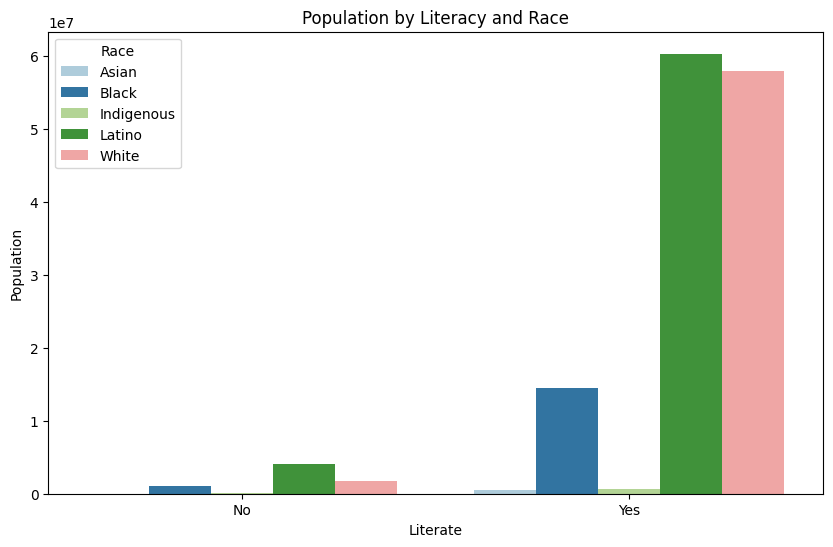

In [564]:
plt.figure(figsize=(10, 6))
sns.barplot(data=race_literacy, x="Literate", y="Population", hue="Race", palette='Paired')
plt.title('Population by Literacy and Race')
plt.show()

In [565]:
race_age = df.groupby(['Age-Group', 'Race']).agg(
    Population=('Population', 'sum')
)
race_age

Population
Age-Group Race                  
15-19     Asian          42066.0
          Black        1403059.0
          Indigenous    123236.0
          Latino       7196383.0
          White        5610575.0
20-24     Asian          49540.0
          Black        1725800.0
          Indigenous    112621.0
          Latino       7500613.0
          White        6076604.0
25-34     Asian         108560.0
          Black        3530238.0
          Indigenous    179356.0
          Latino      14564226.0
          White       12557978.0
35-44     Asian         134648.0
          Black        3701846.0
          Indigenous    148021.0
          Latino      14705924.0
          White       13552562.0
45-54     Asian         116579.0
          Black        2962748.0
          Indigenous    106617.0
          Latino      11565177.0
          White       11486257.0
55-64     Asian         108995.0
          Black        2263936.0
          Indigenous     76713.0
          Latino       8768536.0
          White       10294372.0

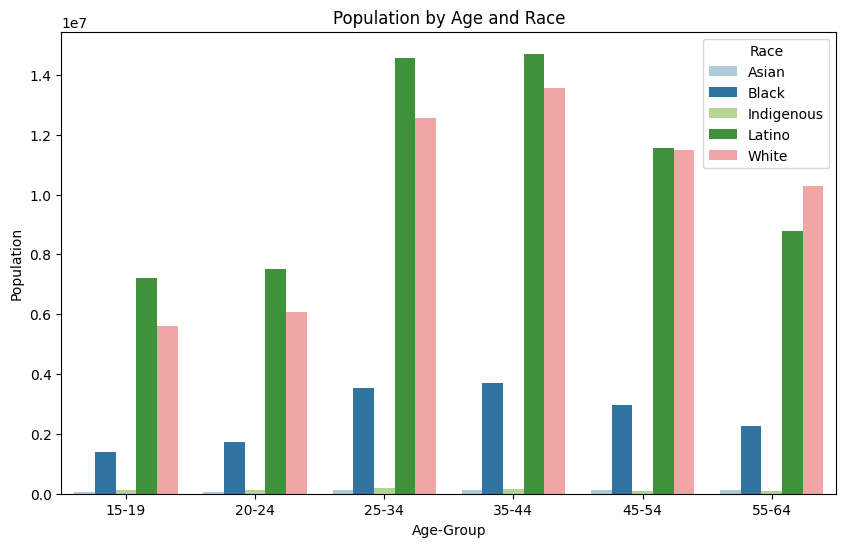

In [566]:
plt.figure(figsize=(10, 6))
sns.barplot(data=race_age, x="Age-Group", y="Population", hue="Race", palette='Paired')
plt.title('Population by Age and Race')
plt.show()